# Read the data

# Import packages

In [11]:
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
from spectral import *

# Dimensionality Reduction

## PCA

In [66]:
pc = principal_components(r1_reg)
pc.cov.shape

(372, 372)

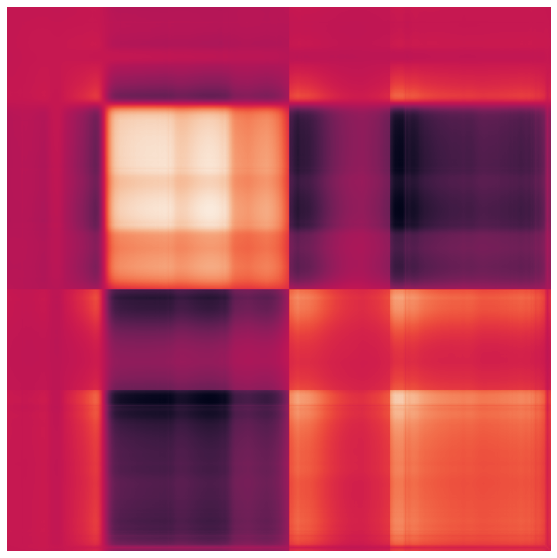

In [67]:
# Covariance matrix
fig, ax = plt.subplots(figsize=(10,10))
plt.imshow(pc.cov)
plt.axis('off')
plt.show()

In [70]:
# First 24 components keep 99.8% of variance
pc_red = pc.reduce(fraction=0.998)
len(pc_red.eigenvalues)

24

In [71]:
pca_red = pc_red.transform(r1_reg)
pca_red.shape
pca_red = {"pca_red": pca_red}
scipy.io.savemat("pca_red.mat", pca_red)

In [72]:
pca = decomposition.PCA(n_components=24)
r1_reshape = reshape(r1_reg,[250000,372])
r1_reg_red = pca.fit_transform(r1_reshape)
pca_den = pca.inverse_transform(r1_reg_red)
pca_den = reshape(pca_den,[500,500,372])

pca_den = {"pca_den": pca_den}
scipy.io.savemat("pca_den.mat", pca_den)

## MNF

In [62]:
signal = calc_stats(r1_reg)
noise = noise_from_diffs(r1_reg[465: 500, 480: 500, :])
mnfr = mnf(signal, noise)

# Reduce dimensionality, retaining NAPC components where SNR >= 10.
mnf_red = mnfr.reduce(r1_reg, snr=20)


# De-noise the data by eliminating NAPC components where SNR < 10.
mnf_den = mnfr.denoise(r1_reg, snr=5)

In [63]:
mnf_red.shape

(500, 500, 83)

In [64]:
mnf_red = {"mnf_red": mnf_red}
scipy.io.savemat("mnf_red.mat", mnf_red)

mnf_den = {"mnf_den": mnf_den}
scipy.io.savemat("mnf_den.mat", mnf_den)

## ICA

In [9]:
ica = decomposition.FastICA(n_components= 30)
r1_reshape = reshape(r1_reg,[250000,372])
ica_red = ica.fit_transform(r1_reshape)
ica_den = ica.inverse_transform(ica_red)
ica_red = reshape(ica_red,[500,500,30])
ica_den = reshape(ica_den,[500,500,372])
ica_den.shape

(500, 500, 372)

In [10]:
ica_red = {"ica_red": ica_red}
scipy.io.savemat("ica_red.mat", ica_red)
ica_den = {"ica_den": ica_den}
scipy.io.savemat("ica_den.mat", ica_den)

In [12]:
ica_red['ica_red'].shape

(500, 500, 30)

## kPCA with Gaussian Kernel （not capable for large dataset）

In [5]:
kpca = decomposition.KernelPCA(n_components=30, kernel='rbf', n_jobs=-1)
r1_reshape = reshape(r1_reg,[250000,372])
r1_reshape.shape

(250000, 372)

In [7]:
r1_shuf = random.permutation(r1_reshape)
r1_shuf = r1_shuf[0:25000,:]
kpca.fit(r1_shuf)

KernelPCA(kernel='rbf', n_components=30, n_jobs=-1)

In [ ]:
kpca_red = kpca.transform(r1_reshape)
kpca_red = reshape(kpca_red,[500,500,30])
kpca_red = {"kpca_red": kpca_red}
scipy.io.savemat("kpca_red.mat", kpca_red)
kpca_red.shape

In [ ]:
kpca_red = reshape(kpca_red,[250000,30])
kpca_den = kpca.inverse_transform(kpca_red)
kpca_den = reshape(kpca_den,[500,500,372])
kpca_den = {"kpca_den": kpca_den}